Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Sample code for GaussianMixture

c:\Users\akars\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\akars\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


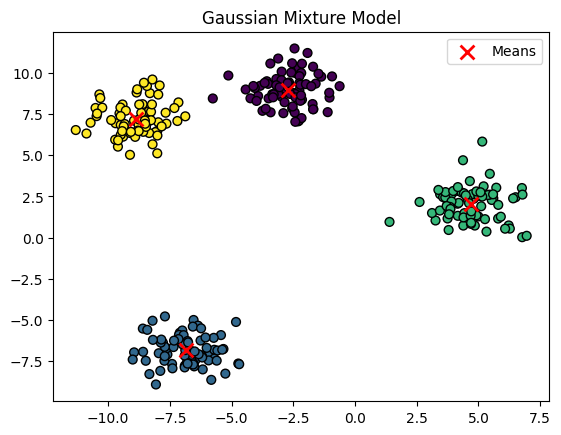

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Plot the data points with colors representing the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='o')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='x', s=100, linewidths=2, label='Means')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()

Loading Dataset

In [3]:
dataset=pd.read_csv('./../data/combined_dataset.csv')
dataset

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
0,S01006506,Culter,Aberdeen City,904.0,605.0,0.07,60.0,0.07,40.0,60,...,8.437832,5.987087,5.711433,8.00642939150402,88.5666968086728,87.0,10.0,0.102113,0.011737,2016
1,S01006507,Culter,Aberdeen City,830.0,491.0,0.07,60.0,0.05,25.0,40,...,8.331833,7.262817,6.794300,4.00321469575201,48.2315023584579,85.0,4.0,0.101675,0.004785,2016
2,S01006508,Culter,Aberdeen City,694.0,519.0,0.05,30.0,0.03,15.0,45,...,7.853631,5.827924,5.251454,4.00321469575201,57.6832088725073,31.0,8.0,0.048212,0.012442,2016
3,S01006509,Culter,Aberdeen City,573.0,354.0,0.05,30.0,0.06,20.0,65,...,7.434491,8.311862,8.444698,*,*,42.0,6.0,0.072414,0.010345,2016
4,S01006510,Culter,Aberdeen City,676.0,414.0,0.10,70.0,0.07,30.0,75,...,5.141013,6.627376,6.619130,12.009644087256,177.657456912071,50.0,7.0,0.086655,0.012132,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
8052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
8053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


Cleaninig the Dataset.

In [4]:
dataset=dataset[dataset['Data_Zone'].notna()]
dataset

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
0,S01006506,Culter,Aberdeen City,904.0,605.0,0.07,60.0,0.07,40.0,60,...,8.437832,5.987087,5.711433,8.00642939150402,88.5666968086728,87.0,10.0,0.102113,0.011737,2016
1,S01006507,Culter,Aberdeen City,830.0,491.0,0.07,60.0,0.05,25.0,40,...,8.331833,7.262817,6.794300,4.00321469575201,48.2315023584579,85.0,4.0,0.101675,0.004785,2016
2,S01006508,Culter,Aberdeen City,694.0,519.0,0.05,30.0,0.03,15.0,45,...,7.853631,5.827924,5.251454,4.00321469575201,57.6832088725073,31.0,8.0,0.048212,0.012442,2016
3,S01006509,Culter,Aberdeen City,573.0,354.0,0.05,30.0,0.06,20.0,65,...,7.434491,8.311862,8.444698,*,*,42.0,6.0,0.072414,0.010345,2016
4,S01006510,Culter,Aberdeen City,676.0,414.0,0.10,70.0,0.07,30.0,75,...,5.141013,6.627376,6.619130,12.009644087256,177.657456912071,50.0,7.0,0.086655,0.012132,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,S01010987,Newbattle and Dalhousie,Midlothian,653.0,451.0,0.01,5.0,0.02,9.0,55.0,...,11.889787,18.775646,9.483275,3,47,5.0,0.0,0.010000,0.000000,2020
8038,S01008512,Craiglockhart,City of Edinburgh,522.0,320.0,0.00,0.0,0.01,3.0,20.0,...,7.680317,8.135619,9.035738,9,175,6.0,2.0,0.010000,0.000000,2020
8039,S01008537,Comiston and Swanston,City of Edinburgh,659.0,366.0,0.00,0.0,0.02,6.0,20.0,...,10.419287,9.911003,19.339926,3,46,15.0,6.0,0.020000,0.010000,2020
8040,S01008622,Marchmont West,City of Edinburgh,512.0,406.0,0.00,0.0,0.00,2.0,25.0,...,4.719671,6.735116,6.548124,4,79,81.0,15.0,0.160000,0.030000,2020


In [5]:
dataset.describe()

,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,ALCOHOL,DRUG,SMR,EMERG,...,drive_retail,drive_secondary,PT_GP,PT_Post,PT_retail,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
count,8042.000000,8042.000000,8040.000000,8042.000000,8040.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,...,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000
mean,773.620617,500.776424,0.121623,92.655558,0.105061,51.381870,99.330153,95.947311,98.990301,99.007814,...,5.081690,5.945417,10.046098,8.469875,13.102799,83.870057,13.766600,0.111320,0.018261,2016.530216
std,200.509331,163.736946,0.095424,75.261552,0.079730,41.238569,99.790209,147.090533,45.677567,34.148308,...,5.765077,4.896820,5.942590,4.386443,10.127055,65.128254,17.783708,0.079961,0.022527,1.356453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.717688,...,0.685475,1.017791,1.601271,1.930570,1.835432,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,638.000000,400.000000,0.050000,35.000000,0.040000,20.000000,32.799203,0.000000,70.000000,72.655842,...,2.777500,3.628994,6.267574,5.568977,7.823843,36.000000,3.000000,0.050000,0.004283,2016.000000
50%,758.000000,479.000000,0.100000,70.000000,0.080000,40.000000,70.165935,43.320199,92.000000,93.065572,...,3.946242,4.776938,8.665514,7.465039,10.969180,68.000000,8.000000,0.093750,0.010345,2016.000000
75%,884.000000,569.000000,0.180000,130.000000,0.150000,70.000000,133.146010,129.245471,120.000000,120.540397,...,5.730346,6.531299,12.007307,10.139799,15.499208,114.000000,17.000000,0.152297,0.023510,2016.000000
max,3847.000000,3423.000000,0.730000,555.000000,0.530000,325.000000,2350.544008,1864.126199,950.000000,323.786253,...,190.000000,116.149193,108.789987,40.277934,190.000000,490.000000,187.000000,0.583882,0.214964,2020.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8042 entries, 0 to 8041
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data_Zone                       8042 non-null   object 
 1   Intermediate_Zone               8042 non-null   object 
 2   Council_area                    8042 non-null   object 
 3   Total_population                8042 non-null   float64
 4   Working_age_population_revised  8042 non-null   float64
 5   Income_rate                     8040 non-null   float64
 6   Income_count                    8042 non-null   float64
 7   Employment_rate                 8040 non-null   float64
 8   Employment_count                8042 non-null   float64
 9   CIF                             8042 non-null   object 
 10  ALCOHOL                         8042 non-null   float64
 11  DRUG                            8042 non-null   float64
 12  SMR                             8042 no

In [8]:
dataset.columns

Index(['Data_Zone', 'Intermediate_Zone', 'Council_area', 'Total_population',
       'Working_age_population_revised', 'Income_rate', 'Income_count',
       'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment', 'Noquals',
       'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO', 'drive_primary',
       'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post', 'PT_retail',
       'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheat_count',
       'overcrowded_rate', 'nocentralheat_rate', 'year'],
      dtype='object')

Sample on the dataset

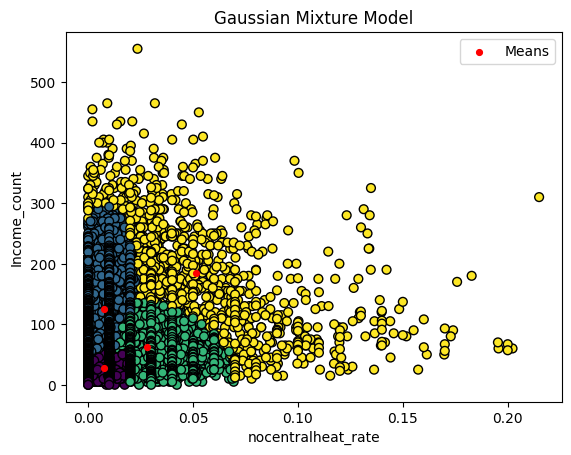

In [20]:
label1='nocentralheat_rate'
label2='Income_count'
X = dataset[[label1,label2]].values

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Plot the data points with colors representing the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='o')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='.', s=40, linewidths=2, label='Means')
plt.title('Gaussian Mixture Model')
plt.xlabel(label1)
plt.ylabel(label2)
plt.legend()
plt.show()